In [ ]:
from google.colab import files

uploaded=files.upload()

Saving amazon_reviews.csv to amazon_reviews.csv


In [ ]:
import pandas as pd
import io
data=pd.read_csv(io.BytesIO(uploaded['amazon_reviews.csv']))
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [ ]:

df=pd.DataFrame(data)
cols=[0,2,3,4]
df=df[df.columns[cols]]
print(df.info(),end='\n\n\n')
df=df.head(1000)
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4915 non-null   int64  
 1   overall     4915 non-null   float64
 2   reviewText  4914 non-null   object 
 3   reviewTime  4915 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 153.7+ KB
None




(1000, 4)

In [ ]:
import string,nltk
import re
#  to remove the punctuation
df['reviewText'] = df['reviewText'].str.replace(r'[^\w\s]+', '')
#datac=data.copy()
df.isnull().sum()
#df['reviewText']=df['reviewText'].fillna('missing value')
df=df.dropna()
print(df.head(),end='\n\n')
print(df.isnull().sum(),end='\n\n')
df['overall'].value_counts()

   Unnamed: 0  overall                                         reviewText  \
0           0      4.0                                          No issues   
1           1      5.0  Purchased this for my device it worked as adve...   
2           2      4.0  it works as expected I should have sprung for ...   
3           3      5.0  This think has worked out greatHad a diff bran...   
4           4      5.0  Bought it with Retail Packaging arrived legit ...   

   reviewTime  
0  2014-07-23  
1  2013-10-25  
2  2012-12-23  
3  2013-11-21  
4  2013-07-13  

Unnamed: 0    0
overall       0
reviewText    0
reviewTime    0
dtype: int64



<ipython-input-4-9edca178626f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviewText'] = df['reviewText'].str.replace(r'[^\w\s]+', '')


5.0    791
4.0    119
1.0     47
3.0     26
2.0     16
Name: overall, dtype: int64

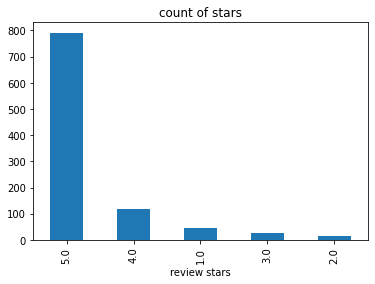

In [ ]:
from matplotlib import pyplot as plt
df['overall'].value_counts().plot(kind='bar',title='count of stars')
plt.xlabel('review stars')
plt.show() 

In [ ]:
#function for classifying text as positive ,negative,neutral
def fun(row):
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

df['sentiment']=df.apply(fun,axis=1)
df.head()
df['sentiment'].value_counts()

Positive    910
Negative     63
Neutral      26
Name: sentiment, dtype: int64

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
s=SentimentIntensityAnalyzer()
#s.polarity_scores(df['reviewText'].values[59])
df['compound']=df['reviewText'].astype(str).map(lambda text:s.polarity_scores(text)['compound'])
df['positive']=df['reviewText'].astype(str).map(lambda text:s.polarity_scores(text)['pos'])
df['neutral']=df['reviewText'].astype(str).map(lambda text:s.polarity_scores(text)['neu'])
df['negative']=df['reviewText'].astype(str).map(lambda text:s.polarity_scores(text)['neg'])

df.head()

,Unnamed: 0,overall,reviewText,reviewTime,sentiment,compound,positive,neutral,negative
0,0,4.0,No issues,2014-07-23,Positive,-0.2960,0.000,0.312,0.688
1,1,5.0,Purchased this for my device it worked as adve...,2013-10-25,Positive,-0.2960,0.000,0.925,0.075
2,2,4.0,it works as expected I should have sprung for ...,2012-12-23,Positive,-0.3089,0.000,0.923,0.077
3,3,5.0,This think has worked out greatHad a diff bran...,2013-11-21,Positive,0.6486,0.082,0.918,0.000
4,4,5.0,Bought it with Retail Packaging arrived legit ...,2013-07-13,Positive,0.7087,0.127,0.835,0.038


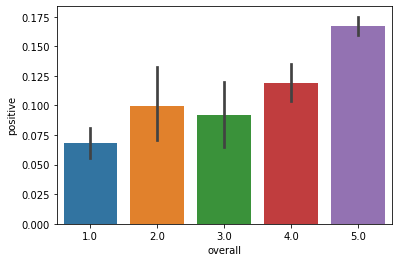

In [ ]:
import seaborn as sns
sns.barplot(data=df,x='overall',y='positive')

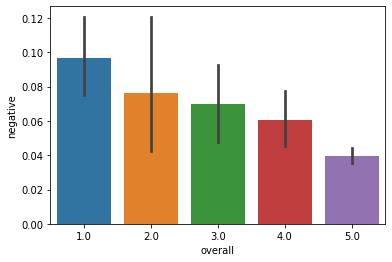

In [ ]:
sns.barplot(data=df,x='overall',y='negative')

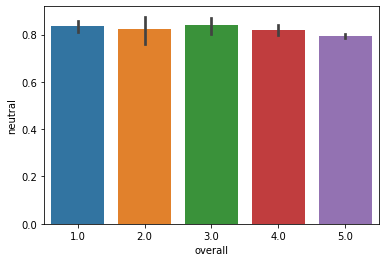

In [ ]:
sns.barplot(data=df,x='overall',y='neutral')

In [ ]:
from textblob import TextBlob
df['polarity']=df['reviewText'].astype(str).map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

,Unnamed: 0,overall,reviewText,reviewTime,sentiment,compound,positive,neutral,negative,polarity
0,0,4.0,No issues,2014-07-23,Positive,-0.2960,0.000,0.312,0.688,0.000000
1,1,5.0,Purchased this for my device it worked as adve...,2013-10-25,Positive,-0.2960,0.000,0.925,0.075,0.200000
2,2,4.0,it works as expected I should have sprung for ...,2012-12-23,Positive,-0.3089,0.000,0.923,0.077,0.129167
3,3,5.0,This think has worked out greatHad a diff bran...,2013-11-21,Positive,0.6486,0.082,0.918,0.000,0.025000
4,4,5.0,Bought it with Retail Packaging arrived legit ...,2013-07-13,Positive,0.7087,0.127,0.835,0.038,0.386667


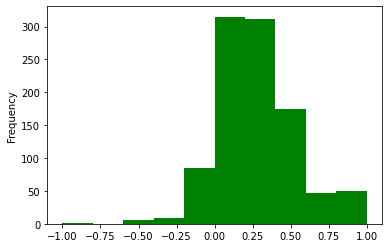

In [ ]:
df['polarity'].plot(kind='hist',color='green')
#by the graph we can say that we have lot of positive polarities